# Исследование объявлений о продаже квартир

В наличии данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Анализ-дубликатов" data-toc-modified-id="Анализ-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ дубликатов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Площадь</a></span></li><li><span><a href="#Цена" data-toc-modified-id="Цена-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Фильтрация-аномальных-значений" data-toc-modified-id="Фильтрация-аномальных-значений-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Фильтрация аномальных значений</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Сегмент-квартир-в-центре" data-toc-modified-id="Сегмент-квартир-в-центре-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Сегмент квартир в центре</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = 10.0, 6.0

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t')

Выведем первые 5 строчек исходных данных:

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Согласно документации к столбцам:
* **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
* **balcony** — число балконов
* **ceiling_height** — высота потолков (м)
* **cityCenters_nearest** — расстояние до центра города (м)
* **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
* **first_day_exposition** — дата публикации
* **floor** — этаж
* **floors_total** — всего этажей в доме
* **is_apartment** — апартаменты (булев тип)
* **kitchen_area** — площадь кухни в квадратных метрах (м²)
* **last_price** — цена на момент снятия с публикации
* **living_area** — жилая площадь в квадратных метрах (м²)
* **locality_name** — название населённого пункта
* **open_plan** — свободная планировка (булев тип)
* **parks_around3000** — число парков в радиусе 3 км
* **parks_nearest** — расстояние до ближайшего парка (м)
* **ponds_around3000** — число водоёмов в радиусе 3 км
* **ponds_nearest** — расстояние до ближайшего водоёма (м)
* **rooms** — число комнат
* **studio** — квартира-студия (булев тип)
* **total_area** — площадь квартиры в квадратных метрах (м²)
* **total_images** — число фотографий квартиры в объявлении

Выведем 5 последних строчек:

In [4]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,nan,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,nan
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,False,False,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,False,False,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,False,False,23.30,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00
23698,4,1350000.00,32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,nan,поселок Новый Учхоз,nan,nan,nan,nan,nan,nan,nan


Выведем 5 случайных строчек:

In [5]:
df.sample(5, random_state=5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12847,0,3500000.00,46.00,2016-06-23T00:00:00,2,nan,5.00,32.00,2,False,False,False,6.00,1.00,Санкт-Петербург,22083.00,769.00,0.00,nan,2.00,249.00,6.00
12205,5,5450000.00,48.00,2019-04-30T00:00:00,2,2.50,9.00,31.00,5,NaN,False,False,8.00,1.00,Санкт-Петербург,41832.00,10003.00,0.00,nan,0.00,nan,nan
4587,20,12100000.00,97.00,2018-03-03T00:00:00,3,2.80,4.00,nan,4,NaN,False,False,nan,nan,Санкт-Петербург,25277.00,4091.00,1.00,549.00,1.00,698.00,220.00
6551,5,5250000.00,34.20,2019-02-21T00:00:00,1,2.80,10.00,14.20,4,NaN,False,False,8.00,2.00,Санкт-Петербург,19092.00,4441.00,0.00,nan,0.00,nan,43.00
10885,19,5150000.00,41.00,2017-11-17T00:00:00,1,nan,24.00,18.00,20,NaN,False,False,10.00,1.00,Санкт-Петербург,7201.00,13417.00,1.00,1199.00,0.00,nan,60.00


Основная информация:

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Описательные статистики:

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,23699.00,6541548.77,10887013.27,12190.00,3400000.00,4650000.00,6800000.00,763000000.00
total_area,23699.00,60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,23699.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,14504.00,2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,23613.00,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,21796.00,34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,23699.00,5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,21421.00,10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,12180.00,1.15,1.07,0.00,0.00,1.00,2.00,5.00


### Вывод

Исходные данные содержат основную информацию об объектах недвижимости в Санкт - Петербурге и примыкающих к нему населенных пунктах. Некоторые колонки содержат большое количество пропусков. Необходимо установить происхождение пропусков и по возможности обработать их. Рассмотрев описательные статистики таких показателей как:
* количество комнат;
* общая площадь;
* цена;

Можно сказать, что в данных присутствуют как элитные объекты, так и бюджетные. В дальнейшем мы рассмотрим взаимосвязь между ценой недвижимости и различными атрибутами. Также будет необходимо выявить аномальные значения и рассматривать отфильтрованные данные.

## Предобработка данных

### Обработка пропусков

Рассчитаем количество пропусков по каждому столбцу:

In [8]:
df.isna().sum().to_frame('missed_values')

,missed_values
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


Пропуски обнаружены в таких столбцах, как:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* floors_total - всего этажей в доме
* locality_name - название населённого пункта

Рассмотрим количество пропусков по каждому столбцу в процентном соотношении:

In [9]:
df.isna().mean().to_frame('missed_values')

,missed_values
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,0.39
floors_total,0.00
living_area,0.08
floor,0.00
is_apartment,0.88


Можно заметить, что в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` одинаковый процент пропусков. Рассмотрим эти столбцы поподробнее:

In [10]:
df.query('parks_around3000.isna() and \
          ponds_around3000.isna() and \
          airports_nearest.isna() and \
          cityCenters_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,False,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,False,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
12,10,3890000.00,54.00,2016-06-30T00:00:00,2,nan,5.00,30.00,5,NaN,False,False,9.00,0.00,Сертолово,nan,nan,nan,nan,nan,nan,90.00
22,20,5000000.00,58.00,2017-04-24T00:00:00,2,2.75,25.00,30.00,15,NaN,False,False,11.00,2.00,деревня Кудрово,nan,nan,nan,nan,nan,nan,60.00
30,12,2200000.00,32.80,2018-02-19T00:00:00,1,nan,9.00,nan,2,NaN,False,False,nan,nan,Коммунар,nan,nan,nan,nan,nan,nan,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.00,62.80,2018-09-18T00:00:00,4,2.50,5.00,45.50,3,NaN,False,False,5.50,nan,посёлок Дзержинского,nan,nan,nan,nan,nan,nan,nan
23692,2,1350000.00,30.00,2017-07-07T00:00:00,1,nan,5.00,17.50,4,NaN,False,False,6.00,nan,Тихвин,nan,nan,nan,nan,nan,nan,413.00
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,False,False,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,False,False,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan


Обратим внимание на то, что пропущенные значение в столбцах сопряжены друг с другом. Также в столбце `locality_name` все значения являются населенными пунктами, прилегающими к Санкт-Петербургу. Подтвердим это:

In [11]:
len(df.query("parks_around3000.isna() and 'Санкт' in locality_name"))

0

Таким образом, пропущенные значение в этих столбцах находятся только в агломерациях Санкт - Петербурга. Пропуски оставим без изменений

Рассмотрим пропуски в стобцах `parks_nearest` и `ponds_nearest`:

In [12]:
df.query('parks_nearest.isna() and ponds_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,False,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,nan,0.00,nan,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,nan,0.00,nan,nan
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,False,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.00,101.00,2019-04-01T00:00:00,3,3.05,15.00,63.00,12,NaN,False,False,15.00,nan,Санкт-Петербург,15632.00,14428.00,0.00,nan,0.00,nan,23.00
23692,2,1350000.00,30.00,2017-07-07T00:00:00,1,nan,5.00,17.50,4,NaN,False,False,6.00,nan,Тихвин,nan,nan,nan,nan,nan,nan,413.00
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,False,False,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,False,False,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan


Пропущенные значения появляются, если парк или водоем отсутствует в пределах 3-х километров. Или, как мы выяснили, в агломерациях города - там, где нет информации о ближайшем парке или водоеме. Также оставим пропуски без изменений

Логично предположить, что пропуски в столбце, описывающем количество балконов в квартире, характеризует отсутствие балкона в принципе. Эти пропуски заменим на 0. 

In [13]:
df['balcony'].fillna(0, inplace=True)

Рассмотрим распределение данных в столбце `is_apartment`:

In [14]:
df['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Отсутствующих значений большинство. Логично предположить, что при отсутствующих значениях квартира апартаментом не является. Заменим пропуски на `False`:

In [15]:
df['is_apartment'].fillna(False, inplace=True)

Для обработки пропусков в столбцах `kitchen_area` и `living_area` рассмотрим распределение средней и медианной жилой и кухонной площади в зависимости от количества комнат:

In [16]:
pd.pivot_table(df, index='rooms', values=['living_area', 'kitchen_area'], aggfunc=['median', 'mean'])

median                     mean            
      kitchen_area living_area kitchen_area living_area
rooms                                                  
0              nan       18.00          nan       18.87
1             9.04       17.60         9.55       17.89
2             8.80       30.50         9.98       31.74
3             9.50       45.00        11.31       47.39
4            11.10       63.60        13.66       66.98
5            15.10       91.78        18.37      100.01
6            19.50      123.90        21.05      130.98
7            20.00      145.00        22.00      163.56
8            25.00      161.00        24.87      168.68
9            14.30      179.20        25.07      190.26
10           19.80      161.40        22.87      165.57
11           12.60      133.90        12.60      133.90
12          112.00      409.70       112.00      409.70
14           21.25      195.15        21.25      195.15
15          100.00      409.00       100.00      409.00
16           13.00      180.00        13.00      180.00
19           27.60      264.50        27.60      264.50

Скорее всего, где количество комнат равно нулю - это студия, значит кухни как таковой там нет и она включена в общую площадь. Следовательно, для таких квартир заменим площадь кухни нулем.

В зависимости от общей площади заменим пропуски для площади кухни и жилой площади средним значением:

In [17]:
df['living_area'] = df.groupby('total_area')['living_area'].transform(lambda area: area.fillna(area.median()))
df['kitchen_area'] = df.groupby('total_area')['kitchen_area'].transform(lambda area: area.fillna(area.median()))

In [18]:
df['kitchen_area'].fillna(0, inplace=True)

Пропуски в столбцах `days_exposition` и `ceiling_height` заменим медианными значением:

In [19]:
df['days_exposition'].fillna(df['days_exposition'].median(), inplace=True)
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

Процент пропусков от общего количества данных в столбцах `living_area`, `floors_total` и `locality_name` составляют менее 1%. Следовательно, можно избавиться от этих строк:

In [20]:
df.dropna(subset=['living_area', 'floors_total', 'locality_name'], inplace=True)

Оставшиеся пропуски:

In [21]:
df.isna().sum().to_frame('missed_values')

,missed_values
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,0
floors_total,0
living_area,0
floor,0
is_apartment,0


### Замена типов данных

Для оптимизации используемой памяти приведем содержимое данных в зависимости от диапазона используемых значений к более подходящим типам. Также приведем значение в столбце `first_day` к типу DateTime:

In [22]:
for col in df.columns:
    if col in ['total_images', 'rooms', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000', 'floors_total']:
        df[col] = df[col].astype('uint8', errors='ignore')
    elif col in ['last_price', 'airports_nearest', 'cityCenters_nearest']:
        df[col] = df[col].astype('uint32', errors='ignore')
    elif col in ['ceiling_height', 'living_area', 'kitchen_area', 'total_area']:
        df[col] = df[col].astype('float32', errors='ignore')
    elif col in ['parks_nearest', 'ponds_nearest', 'days_exposition']:
        df[col] = df[col].astype('uint16', errors='ignore')
    elif 'first_day' in col:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%dT%H:%M:%S')

Взглянем на изменения:

In [23]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23432 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23432 non-null uint8
last_price              23432 non-null uint32
total_area              23432 non-null float32
first_day_exposition    23432 non-null datetime64[ns]
rooms                   23432 non-null uint8
ceiling_height          23432 non-null float32
floors_total            23432 non-null uint8
living_area             23432 non-null float32
floor                   23432 non-null uint8
is_apartment            23432 non-null bool
studio                  23432 non-null bool
open_plan               23432 non-null bool
kitchen_area            23432 non-null float32
balcony                 23432 non-null uint8
locality_name           23432 non-null object
airports_nearest        17945 non-null float64
cityCenters_nearest     17968 non-null float64
parks_around3000        17969 non-null float64
parks_nearest           7985 non-null float64
ponds_around3

### Анализ дубликатов

Проверим данные на наличие явных дубликатов:

In [24]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют

Для анализа неявных дубликатов имеет смысл рассмотреть уникальные значения в столбце `locality_name`:

In [25]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Рассчитаем количество уникальных значений:

In [26]:
len(df['locality_name'].unique())

364

Заметим, что присутствуют дубликаты там, где населенные пункт является поселком. Отсутствует единый стиль написания слова - иногда пишут с буквой `е`, иногда с `ё`. Для приведение к единому стилю cоздадим функцию `change_e`, заменяющая букву `ё` на `е`:

In [27]:
def change_e(locality_name):
    if 'ё' in locality_name:
        locality_name = locality_name.replace('ё', 'е')
    return locality_name 

In [28]:
df['locality_name'] = df['locality_name'].apply(change_e)

Рассчитаем количество уникальных значений после обработки:

In [29]:
len(df['locality_name'].unique())

330

Таким образом, количество уникальных значений сократитлось на 34.

Еще раз проверим на явные дубликаты:

In [30]:
df.duplicated().sum()

0

В любом случае, дубликатов не оказалось.

### Вывод

В ходе предобработки данных были установлены закономерности в пропущенных значениях, которые по возможности заполнены. Также были изменены типы данных в некоторых столбцах для оптимизации хранения памяти и удобства. Таким образом, используемую память удалось сократить почти в 2 раза. Был проведен анализ на явные и невяные дубликаты, обработаны повторяющиеся значения в столбце `locality_name`. Дубликатов в данных не обнаружено.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец `price_per_square` со значениями цены за квадратный метр:

In [31]:
df['price_per_square'] = df['last_price'] / df['total_area']
df['price_per_square'] = df['price_per_square'].astype('uint32')

Добавим в таблицу столбцы `year`, `month`, `weekday` со значениями года, месяца и дня недели даты публикации объявления соответственно:

In [32]:
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['weekday'] = df['first_day_exposition'].dt.weekday

Разобьем значения этажа квартиры на категории:
* Первый
* Другой
* Последний

Для этого напишем функцию `floor_id`, которая возвращает категориальную переменную и применим ее к датафрейму:

In [33]:
def floor_id(row):
    floor = row['floor']
    floor_max = row['floors_total']
    if floor == 1:
        return 'Первый'
    elif floor == floor_max:
        return 'Последний'
    return 'Другой'

In [34]:
df['floor_id'] = df.apply(floor_id, axis=1)
df['floor_id'] = df['floor_id'].astype('category')

Рассчитаем значение доли жилой площади и кухонной площади в столбцах `living/total` и `kitchen/total` соответственно:

In [35]:
df['living/total'] = df['living_area'] / df['total_area']
df['kitchen/total'] = df['kitchen_area'] / df['total_area']

for col in ['living/total', 'kitchen/total']:
    df[col] = df[col].astype('float16')

### Вывод

Для дальнейшего исследовательского анализа данных были рассчитаны следующие значения:
* Цена за квадратный метр
* Год, месяц и день недели публикации объявления
* Доля жилой площади
* Доля кухонной площади

Также были категоризированы данные этажа квартиры.

## Исследовательский анализ данных

Рассмотрим распределение следующих параметров:
* Общая площадь
* Цена
* Число комнат
* Высота потолков

Исследуем основные факторы, влияющие на стоимость квартиры, рассмотрим ценовое распределение в соседних населенных пунктах.

### Площадь

Выведем основую статистическую информацию об общей площади квартиры:

In [36]:
df['total_area'].describe()

count   23432.00
mean       60.03
std        34.46
min        12.00
25%        40.00
50%        52.00
75%        69.50
max       900.00
Name: total_area, dtype: float64

Площадь квартиры варируется от 12 м² до 900 м². При этом среднее значение - приблизительно 60 м², а медианное - 70 м².
Cтандартное отклонение велико даже несмотря на то, что в данных существуют выбросы

Построим гистограмму:

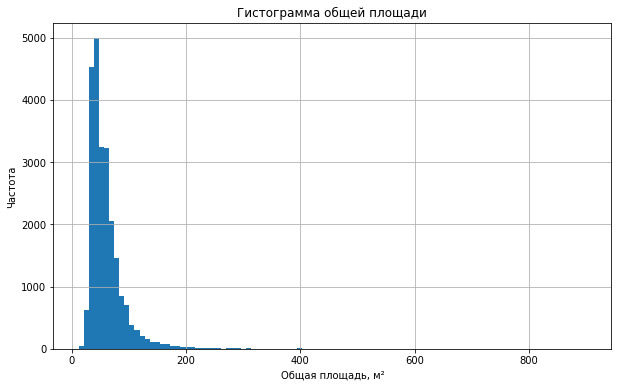

In [37]:
df['total_area'].hist(bins=100)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Частота')
plt.show()

Из графика видно, что большинство значений лежит в пределах 200 м². C учетом этого, перестроим гистограмму:

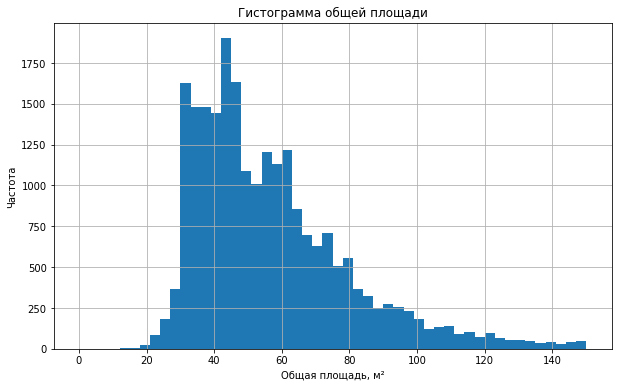

In [38]:
df['total_area'].hist(bins=50, range=(0, 150))
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Частота')
plt.show()

### Цена

Выведем основую статистическую информацию о цене квартиры:

In [39]:
df['last_price'].describe()

count       23432.00
mean      6475719.24
std      10634957.26
min         12190.00
25%       3400000.00
50%       4620000.00
75%       6750000.00
max     763000000.00
Name: last_price, dtype: float64

Цена квартиры варируется от 12190 р. до 763.000.000 р. При этом явно можно сказать, что оба крайних значения являются выбросами. Средняя цена на квартиру - 6.540.000 р., медианная - 4.646.000 р. Стандартное отклонение - 10.910.000 р., что является слишком большим значением - явно говорит о выбросах.

Для удобства построения гистограммы создадим колонку `last_price_mil`, в которой будут отражена цена в млн. р.

In [40]:
df['last_price_mil'] = df['last_price'] / 10 ** 6

Построим гистограмму распределения:

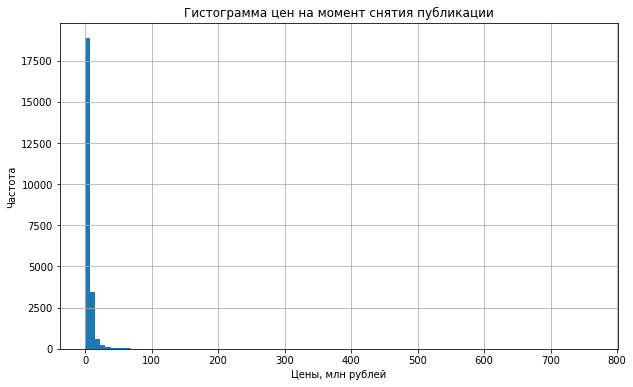

In [41]:
df['last_price_mil'].hist(bins=100)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, млн рублей')
plt.ylabel('Частота')
plt.show()

Из графика видно, что большинство значений лежит в пределах 20 млн. р. Построим гистограмму с учетом данного факта:

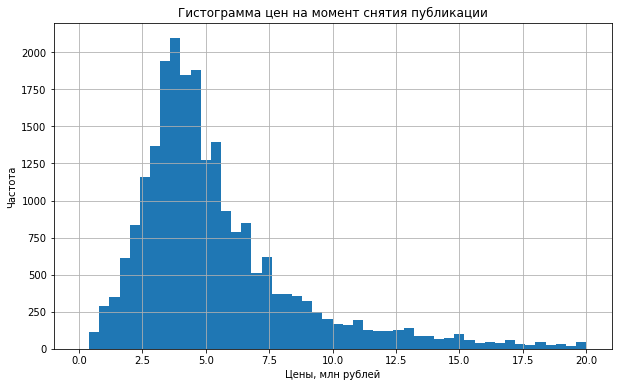

In [42]:
df['last_price_mil'].hist(bins=50, range=(0, 20))
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, млн рублей')
plt.ylabel('Частота')
plt.show()

### Число комнат

Выведем основую статистическую информацию о количестве комнат в квартире:

In [43]:
df['rooms'].describe()

count   23432.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

Взглянем на распределение:

In [44]:
df['rooms'].value_counts(dropna=False).sort_values(ascending=False)

1     7959
2     7857
3     5758
4     1161
5      316
0      193
6      101
7       56
8       12
9        8
10       3
14       2
11       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

В основном продаются однокомнатные квартиры - таких объявлений наибольшее количество. Можно заметить следующую закономерность: с ростом количества комнат, количество объявлений падает. Будем считать, что аномальные значения количества комнат - от 7 и больше. Таких объявлений всего единицы.

Наибольшее количество объявлений у однокомнатных квартир

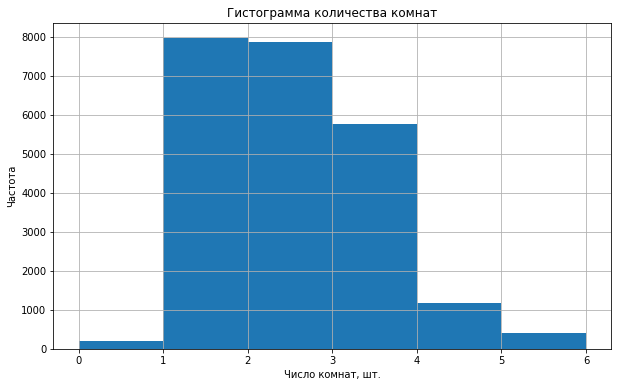

In [45]:
df['rooms'].hist(bins=6, range=(0, 6))
plt.title('Гистограмма количества комнат')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Частота')
plt.show()

### Высота потолков

Выведем основую статистическую информацию о высоте потолков в квартире:

In [46]:
df['ceiling_height'].describe()

count   23432.00
mean        2.72
std         0.99
min         1.00
25%         2.60
50%         2.65
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64

Средняя высота потолка - 2.72 м, медианная - 2.65 м. Можно сразу же заметить явные выбросы по экстремальным значениям - 1 м. и 100 м.

Рассмотрим распределение данных подробнее на гистограмме:

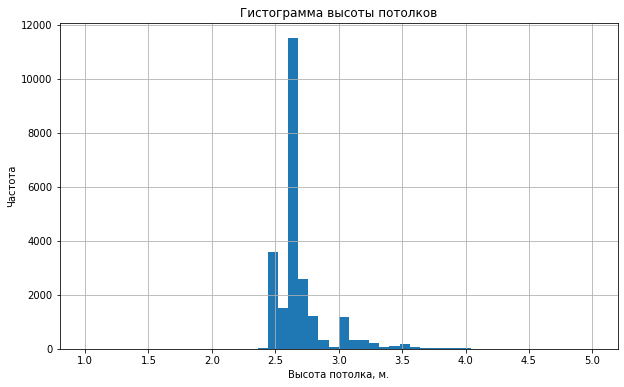

In [47]:
df['ceiling_height'].hist(bins=50, range=(1, 5))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолка, м.')
plt.ylabel('Частота')
plt.show()

Большинство значений распределено в интервале от 2 м. до 4 м. Перестроим гистограмму:

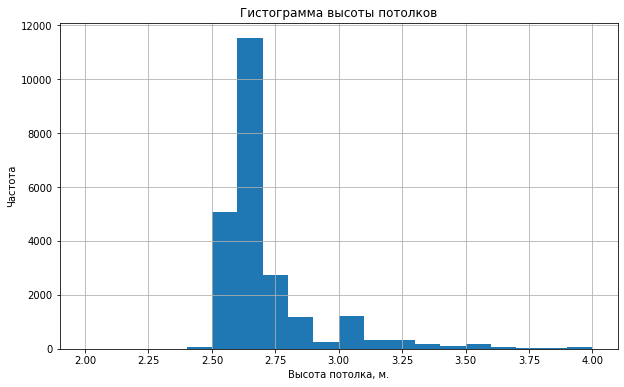

In [48]:
df['ceiling_height'].hist(bins=20, range=(2, 4))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолка, м.')
plt.ylabel('Частота')
plt.show()

### Время продажи квартиры

Выведем основую статистическую информацию о времени продажи квартиры:

In [49]:
df['days_exposition'].describe()

count   23432.00
mean      169.34
std       206.47
min         1.00
25%        45.00
50%        95.00
75%       199.00
max      1580.00
Name: days_exposition, dtype: float64

Среднее время продажи квартиры - 169 дней. Медианное - 95. Данные меры сильно отличаются друг от друга - присутствует влияние аномальных значений. 

Построим гистограмму распределения:

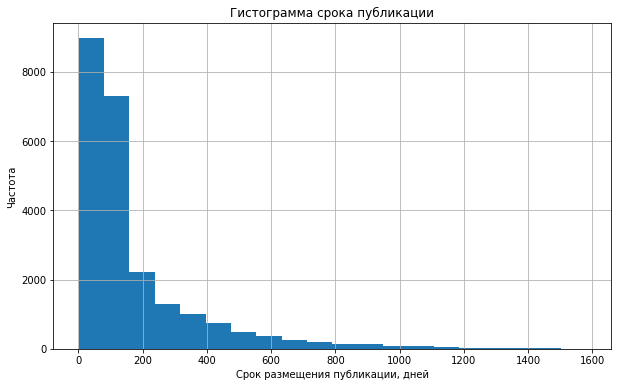

In [50]:
df['days_exposition'].hist(bins=20)
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок размещения публикации, дней')
plt.ylabel('Частота')
plt.show()

Заметим, что имеем высокий пик в интервале от 0 до 100. Рассмотрим его подробнее:

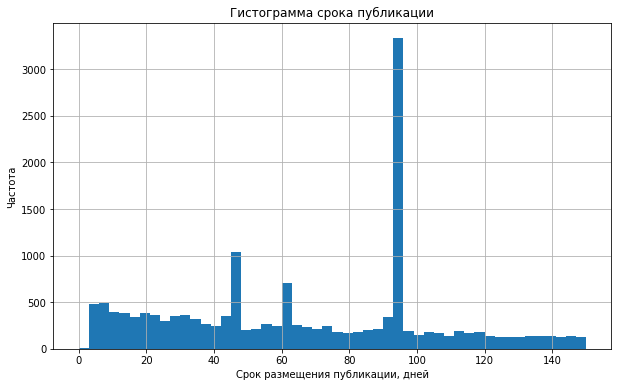

In [51]:
df['days_exposition'].hist(bins=50, range=(0, 150))
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок размещения публикации, дней')
plt.ylabel('Частота')
plt.show()

Видим, что высокие пики соответствуют значениям 45, 60 и 95 дней. Данный факт может быть связан с правилами размещения на площадке. В дальнейшем будем считать эти значения аномальными. Также исходя из гистограммы большинство квартир продаются менее чем за 450 дней. С учетом этих данных перестроим гистограмму:

In [52]:
filtred_days_exp = df.query('days_exposition not in (45, 60, 95) and days_exposition < 450')

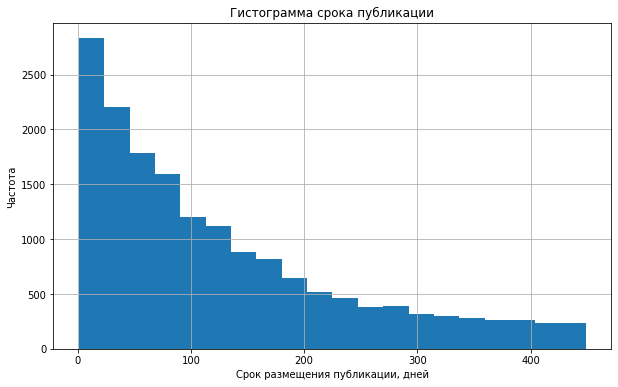

In [53]:
filtred_days_exp['days_exposition'].hist(bins=20)
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок размещения публикации, дней')
plt.ylabel('Частота')
plt.show()

В дальнейшем рассмотрим аномалии по этим параметрам подробнее.

### Фильтрация аномальных значений

Прежде чем приступать к исследованию необходимо избавиться от аномальных значений. Ранее мы уже избавились от аномалий в столбце `days_exposition`. Для точного определения выбивающихся из общей массы значений построим диаграммы размаха:

Cоздадим функцию `boxplot`, которая строит диаграмму размаха:

In [54]:
def boxplot(col, xlim, title, xlabel):
    sns.boxplot(df[col]).set(
        xlim=xlim,
        title=title,
        xlabel=xlabel,
    )
    
    plt.show()

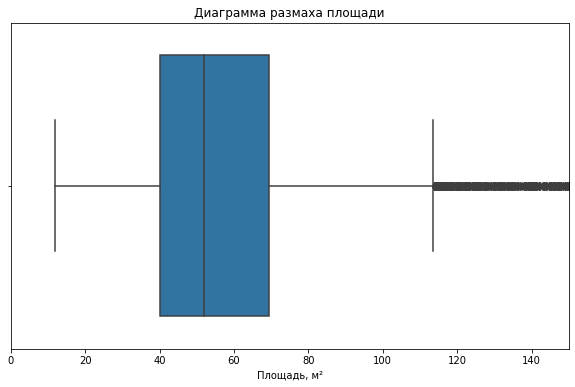

In [55]:
boxplot('total_area', (0, 150), 'Диаграмма размаха площади', 'Площадь, м²')

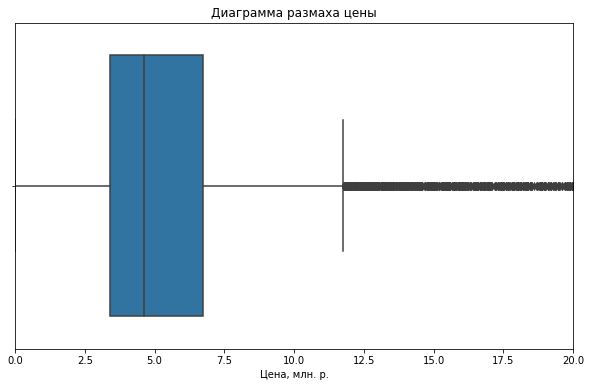

In [56]:
boxplot('last_price_mil', (0, 20), 'Диаграмма размаха цены', 'Цена, млн. р.')

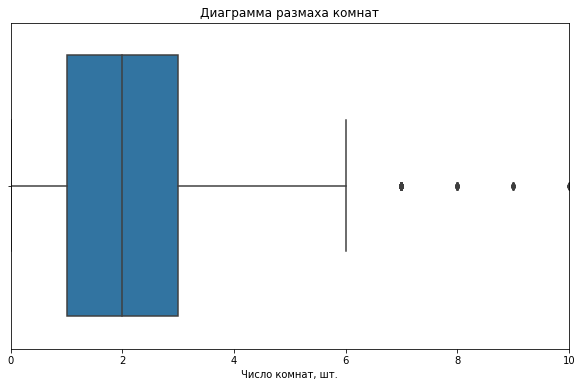

In [57]:
boxplot('rooms', (0, 10), 'Диаграмма размаха комнат', 'Число комнат, шт.')

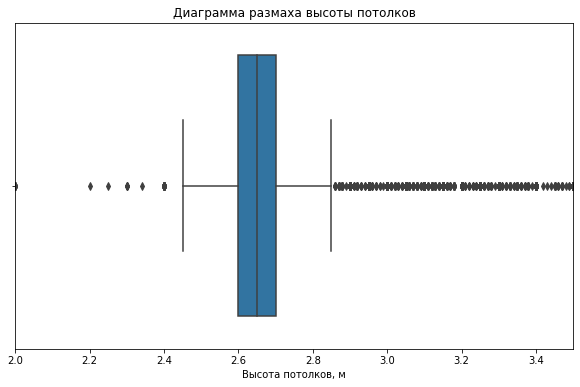

In [58]:
boxplot('ceiling_height', (2, 3.5), 'Диаграмма размаха высоты потолков', 'Высота потолков, м')

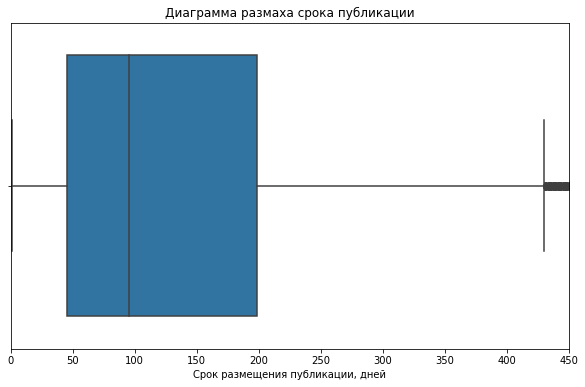

In [59]:
boxplot('days_exposition', (0, 450), 'Диаграмма размаха срока публикации', 'Срок размещения публикации, дней')

Будем считать аномальными значения, выходящии за пределы "усов" диаграммы размаха. Для определения таких значений напишем функцию `valid_values`, которая возвращает словарь с ключами `max_av` и `min_av` с максимальными и минимальными допустимыми значения.

In [60]:
def valid_values(data, col):
    describe = data[col].describe() #Описательные статистики
    
    Q1, Q3 = describe['25%'], describe['75%'] #Первый и третий квартиль
    
    IQR = Q3 - Q1 #Межквартильный размах
    
    min_allow_value = Q1 - 1.5 * IQR
    max_allow_value = Q3 + 1.5 * IQR
    
    
    if min_allow_value < describe['min']:
        min_allow_value = describe['min'] 
    if max_allow_value > describe['max']:
        max_allow_value = describe['max']
        
    return {'max_av': max_allow_value, 'min_av': min_allow_value}

Рассчитаем максимальные и минимальные допустимые значения:

In [61]:
for name in ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']:
    print(f'Допустимые значения для столбца {name}:\n')
    print('Максимальное допустимое значения:', '{:.2f}'.format(valid_values(df, name).get('max_av')))
    print('Минимальное допустимое значения:', '{:.2f}'.format(valid_values(df, name).get('min_av')), '\n')


Допустимые значения для столбца total_area:

Максимальное допустимое значения: 113.75
Минимальное допустимое значения: 12.00 

Допустимые значения для столбца last_price:

Максимальное допустимое значения: 11775000.00
Минимальное допустимое значения: 12190.00 

Допустимые значения для столбца rooms:

Максимальное допустимое значения: 6.00
Минимальное допустимое значения: 0.00 

Допустимые значения для столбца ceiling_height:

Максимальное допустимое значения: 2.85
Минимальное допустимое значения: 2.45 

Допустимые значения для столбца days_exposition:

Максимальное допустимое значения: 430.00
Минимальное допустимое значения: 1.00 



Создадим функцию `filtered_data`, которая возвращает отфильтрованный датафрейм

In [62]:
def filtered_data(data, cols):
    filtered_data = data.copy(deep=True)
    for col in cols:
        filtered_data[col] = filtered_data[col][(filtered_data[col] < valid_values(data, col)['max_av']) &
                                        (filtered_data[col] > valid_values(data, col)['min_av'])]
    return filtered_data.dropna(subset=cols)

В переменной `good_data` содержатся данные без аномалий: 

In [63]:
good_data = filtered_data(df, cols=['total_area', 
                                    'last_price', 
                                    'last_price_mil',
                                    'rooms',
                                    'ceiling_height',
                                    'days_exposition'
                                   ])




Рассчитаем количество утраченных в ходе фильтрации данных:

In [64]:
ratio = len(good_data) / len(df)
print(f'Процент потерянных значений от исходных данных: {1 - ratio:.0%}') 

Процент потерянных значений от исходных данных: 26%


Рассмотрим основные описательные статистики уже отфильтрованных данных:

In [65]:
good_data.query("locality_name == 'Санкт-Петербург'").describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,10787.00,10.09,5.57,0.00,6.00,10.00,14.00,50.00
last_price,10787.00,5387173.79,1910255.94,1190000.00,3990000.00,4900000.00,6400000.00,11768000.00
total_area,10787.00,52.17,16.90,13.00,39.10,48.00,62.20,113.50
rooms,10787.00,1.91,0.86,1.00,1.00,2.00,3.00,5.00
ceiling_height,10787.00,2.63,0.08,2.45,2.56,2.65,2.65,2.85
floors_total,10787.00,12.20,6.29,1.00,9.00,10.00,16.00,52.00
living_area,10787.00,29.75,12.04,3.00,18.20,29.00,38.10,88.00
floor,10787.00,6.55,4.98,1.00,3.00,5.00,9.00,33.00
kitchen_area,10787.00,9.40,3.57,0.00,7.00,8.70,11.00,41.10
balcony,10787.00,0.61,0.95,0.00,0.00,0.00,1.00,5.00


### Факторы, влияющие на стоимость квартиры

Построим матрицу корреляции в треугольном формате на графике типа `heatmap`. Так будет намного нагляднее рассмотреть основные зависимости между значениями.

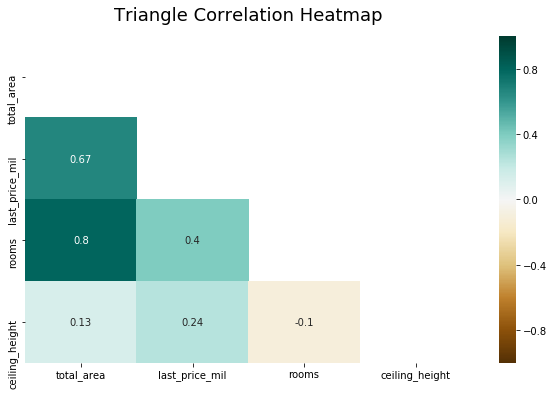

In [66]:
plt.figure()
mask = np.triu(np.ones_like(good_data[['total_area', 'last_price_mil', 'rooms', 'ceiling_height']].corr(),
                            dtype=np.bool))
heatmap = sns.heatmap(good_data[['total_area', 'last_price_mil', 'rooms', 'ceiling_height']].corr(),
                      mask=mask,
                      vmin=-1, vmax=1,
                      annot=True,
                      cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Построим матрицу диаграмм рассеяния:

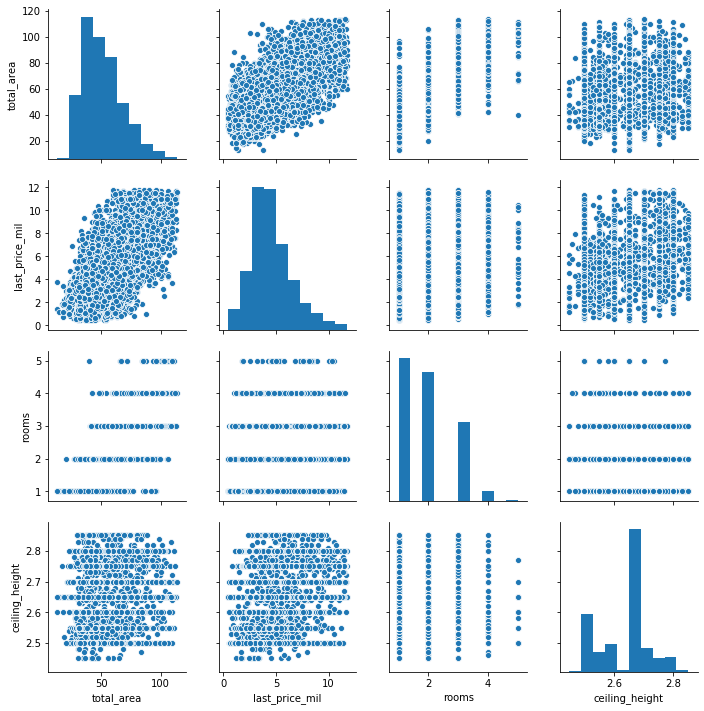

In [67]:
sns.pairplot(good_data[['total_area', 'last_price_mil', 'rooms', 'ceiling_height']])
plt.show()

Общая площадь и цена имеют наибольший коэффициент корреляции - 0.67. Цена на квартиру непосредственно зависит от количества в ней квадратных метров.

Оценим факторы, наиболее сильно влияющие на цену недвижимости:

In [68]:
good_data.corr()['last_price'].sort_values(ascending=False).to_frame('Коэффициент корреляции')[2:]

,Коэффициент корреляции
total_area,0.67
price_per_square,0.64
living_area,0.53
kitchen_area,0.47
rooms,0.40
floors_total,0.31
ceiling_height,0.24
floor,0.21
total_images,0.18
balcony,0.11


Таким образом, ТОП-5 факторов, влияющих на цену недвижимости:

* Общая площадь
* Количество комнат
* Количество этажей в доме
* Высота потолков
* Этаж

Рассмотрим диаграмму рассеяния и hexbin для общей площади и удаленности от центра от цены:

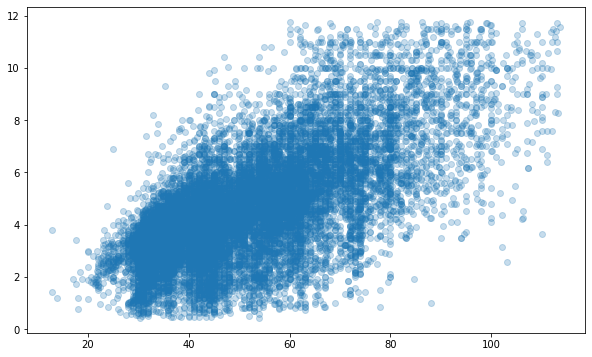

In [69]:
plt.scatter(x='total_area',
            y='last_price_mil',
            data=good_data,
            alpha=0.25)
plt.show()

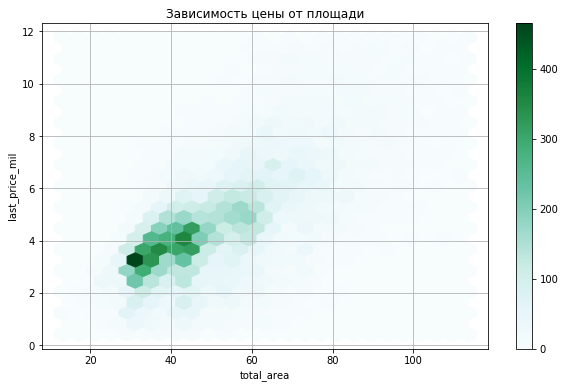

In [70]:
good_data.plot(x='total_area',
               y='last_price_mil',
               kind='hexbin',
               title='Зависимость цены от площади',
               sharex=False,
               gridsize=25,
               grid=True,               
              )
plt.show()

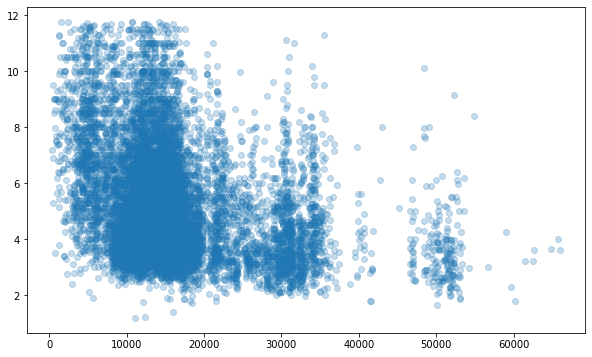

In [71]:
plt.scatter(x='cityCenters_nearest',
            y='last_price_mil',
            data=good_data,
            alpha=0.25)
plt.show()

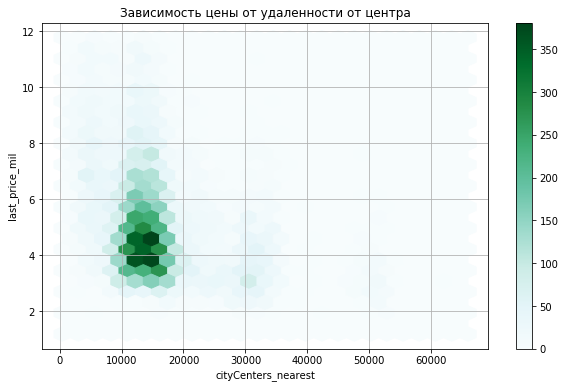

In [72]:
good_data.plot(x='cityCenters_nearest',
               y='last_price_mil',
               kind='hexbin',
               title='Зависимость цены от удаленности от центра',
               sharex=False,
               gridsize=25,
               grid=True,               
              )
plt.show()

Построим графики `boxplot` для определения зависимости между медианной ценой на квартиру и различными параметрами:

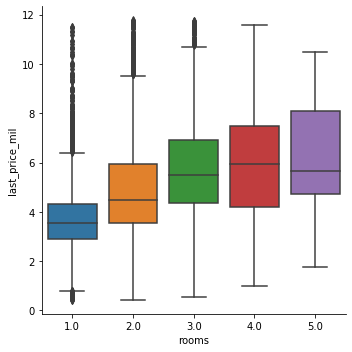

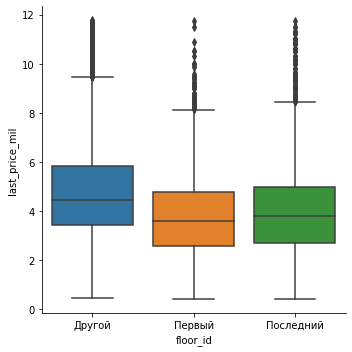

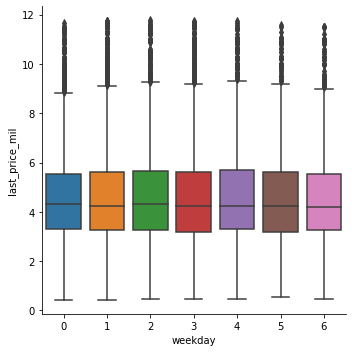

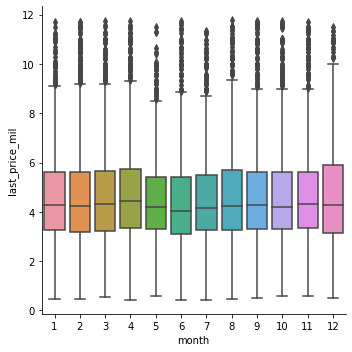

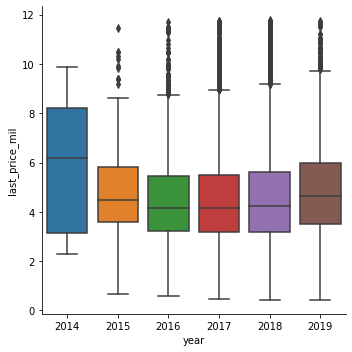

In [73]:
for column in ['rooms', 'floor_id', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y='last_price_mil', kind="box", data=good_data)

**Первый график**: зависимость цены на квартиру от количества комнат. Видно, что чем больше комнат, тем выше медианная цена. Однако медианная цена для 5 комнат оказалась меньше, чем цена для 4х и приблизительно на одном уровне, чем цена для трех. Также можно заметить, что цены на однокомнатную квартиру могут принимать аномальные значения - более 6 млн. р. 

**Второй график**: зависимость цены от этажа квартиры. Видно, что квартиры, находящиемся на первом или последнем этажах имеют медианную цену чуть ниже, чем у квартир на других этажах.

**Остальные графики**: зависимость цены от года, месяца и дня недели. Видно, что как день недели, так и месяц крайне незначительно влияют на цену квартиры. Также можно сказать, что в 2016 году наблюдался пик цен на квартир. В дальнейшем цены стабилизировались, но в 2019 возник некоторый рост цен.

Рассмотрим объявления по квартирам, находящиеся в прилежащих к Санкт-Петербургу населенных пунктах и выберем из них 10 с наибольшим количеством объявлений:

In [74]:
locals_pivot = pd.pivot_table(data=good_data.query("locality_name != 'Санкт-Петербург'"),
               index='locality_name',
               values='price_per_square',
               aggfunc=['count', 'mean'])
locals_pivot.columns = ['count', 'mean']
top_ten_locals = locals_pivot.sort_values(by='count', ascending=False).head(10)

In [75]:
top_ten_locals

,count,mean
locality_name,,
поселок Мурино,467,85393.31
поселок Шушары,396,78324.06
Всеволожск,333,67152.76
поселок Парголово,298,90050.03
Колпино,295,75286.71
Пушкин,270,99512.48
Гатчина,254,68461.30
деревня Кудрово,245,92482.25
Выборг,188,57865.87


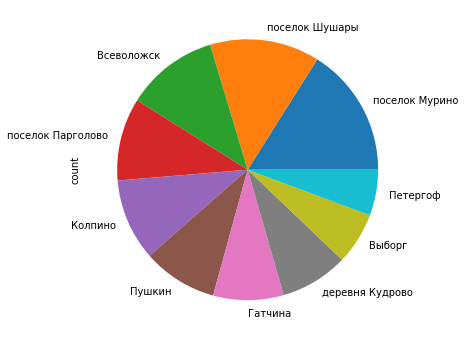

In [76]:
top_ten_locals['count'].plot(kind='pie')

**Наибольшее** количество объявлений в поселке Мурино - 438. **Наименьшее** - в Петергофе: 165 объявлений.

Отсортируем по убыванию цены за квадратный метр и выявим самые дорогие и дешевые варианты:

In [77]:
top_ten_locals.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Пушкин,270,99512.48
деревня Кудрово,245,92482.25
поселок Парголово,298,90050.03
поселок Мурино,467,85393.31
Петергоф,165,83138.88
поселок Шушары,396,78324.06
Колпино,295,75286.71
Гатчина,254,68461.30
Всеволожск,333,67152.76


В Пушкине наиболее **высокая цена** за квадратный метр - 95500. В Выборге самое **доступное жилье** - 57865 р/м^2

Рассмотрим зависимость цены квартиры в Санкт-Петербурге от ее удаленности от центра. Для удобства создадим отдельный датафрейм `spb_data`, в котором построим столбец `cityCenterst_neares_km`, где метры переведены в километры:

In [78]:
spb_data = good_data.query("locality_name == 'Санкт-Петербург'")

In [79]:
spb_data['cityCenters_nearest_km'] = round(spb_data['cityCenters_nearest'] / 10 ** 3)

Построим график зависимости между средней ценой квартиры и ее удаленности от центра:

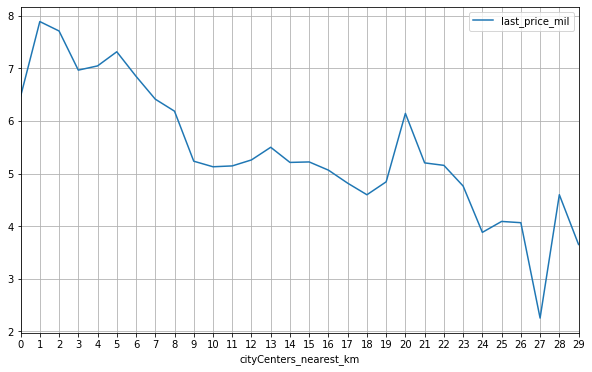

In [80]:
pt_km = spb_data.pivot_table(index='cityCenters_nearest_km',
                     values='last_price_mil',
                     aggfunc='mean'
                    )
pt_km.plot(grid=True, xticks=list(range(0, 30, 1)))
plt.show()

Из графика видно, что чем дальше от центра - тем квартиры дешевле. Заметим резкий перегиб на интервале от 8 до 9 дней: скачок в цене составил приблизительно в 1 млн. р. Таким образом, будем считать, что центр города находится в радиусе 8 км.

### Сегмент квартир в центре

В данном блоке сравним как распределены параметры квартир в центре города и вне его.

Выделим квартиры, находящиеся в центре Санкт-Петербурга и вне центра:

In [81]:
spb_center = spb_data.query('cityCenters_nearest_km <= 8')
spb_no_center = spb_data.query('cityCenters_nearest_km > 8')

Всего таких квартир в центре:

In [82]:
len(spb_center)

1391

Проанализируем различия между квартирами в центре и остальными квартирами:

Создадим функцию `two_describe`, которая выводит описательные статистики для квартир в центре и остальных квартир:

In [83]:
def two_describe(col):
    center = f'Статистика для квартир в центре:\n{spb_center[col].describe()}'
    no_center = f'Статистика для остальных квартир:\n {spb_no_center[col].describe()}'
    print(*(center, no_center), sep='\n' * 2)

Создадим функцию `two_hist` для построения нескольких гистограмм на одном графике:

In [84]:
def two_hist(x_data, title1, xlabel, title2):
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
    ax1.set_title(title1)
    ax1.set_ylabel('Частота')
    ax1.set_xlabel(xlabel)
    hist1 = ax1.hist(x=x_data, data=spb_center, bins=25)
    
    ax2.set_title(title2)
    ax2.set_ylabel('Частота')
    ax2.set_xlabel(xlabel)
    hist2 = ax2.hist(x=x_data, data=spb_no_center, bins=25)
    plt.tight_layout(pad=0.5)

**Площадь:**

Выведем основную статистическую информацию:

In [85]:
two_describe('total_area')

Статистика для квартир в центре:
count   1391.00
mean      59.02
std       19.63
min       13.00
25%       43.65
50%       57.00
75%       72.00
max      113.50
Name: total_area, dtype: float64

Статистика для остальных квартир:
 count   9366.00
mean      51.15
std       16.21
min       13.00
25%       38.90
50%       47.00
75%       61.00
max      113.00
Name: total_area, dtype: float64


Заметим, что среднее и медианное значение у квартир в центре превышает остальные квартиры на 8 и 10 квадратных метров.

Построим гистограммы распределения для квартир в центре и не в центре:

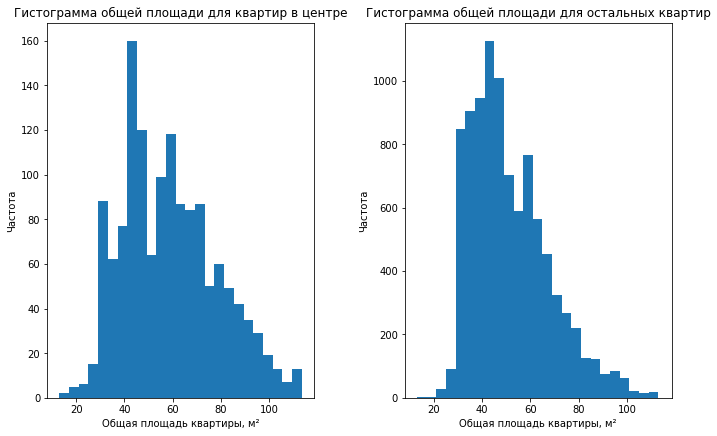

In [86]:
two_hist('total_area',
         'Гистограмма общей площади для квартир в центре',
         'Общая площадь квартиры, м²',
         'Гистограмма общей площади для остальных квартир'
        )

Распределение площади по сегментам квартир приблизительно совпадают. **Наибольшее** количество объявлений наблюдается при общей площади чуть более 40 м². Также в центре чаще встречаются большие квартиры.

**Цена**:

Выведем основную статистическую информацию:

In [87]:
two_describe('last_price_mil')

Статистика для квартир в центре:
count   1391.00
mean       6.84
std        2.18
min        1.90
25%        5.15
50%        6.70
75%        8.50
max       11.77
Name: last_price_mil, dtype: float64

Статистика для остальных квартир:
 count   9366.00
mean       5.17
std        1.76
min        1.19
25%        3.90
50%        4.74
75%        6.00
max       11.76
Name: last_price_mil, dtype: float64


Квартиры в центре имеют более высокую стоимость. В среднем на 1.5 млн.р. Соответственно дороже и минимальная стоимость жилья. Однако максимальная стоимость и там и там совпадает. Это может быть связано с тем, что при фильтрации аномальных значений были убраны явные выбросы.

Построим гистограммы распределения:

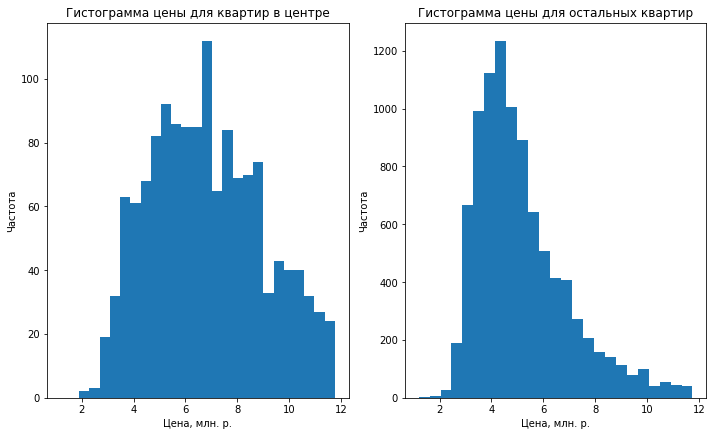

In [88]:
two_hist('last_price_mil',
         'Гистограмма цены для квартир в центре',
         'Цена, млн. р.',
         'Гистограмма цены для остальных квартир'
        )

Из графиков видно, что дорогое жилье чаще встречается в центре. Для жилья не в центре имеется пик объявлений по цене приблизительно в 4.5 - 5 млн. р. Далее заметно резкое снижение количества объявлений по мере возрастания цены. Цены же в центре распределены более равномерно.

**Число комнат**:

Выведем основную статистическую информацию:

In [89]:
two_describe('rooms')

Статистика для квартир в центре:
count   1391.00
mean       2.07
std        0.87
min        1.00
25%        1.00
50%        2.00
75%        3.00
max        5.00
Name: rooms, dtype: float64

Статистика для остальных квартир:
 count   9366.00
mean       1.89
std        0.86
min        1.00
25%        1.00
50%        2.00
75%        3.00
max        5.00
Name: rooms, dtype: float64


Число комнат для обоих сегментов примерно совпадает.

Построим гистограммы распределения:

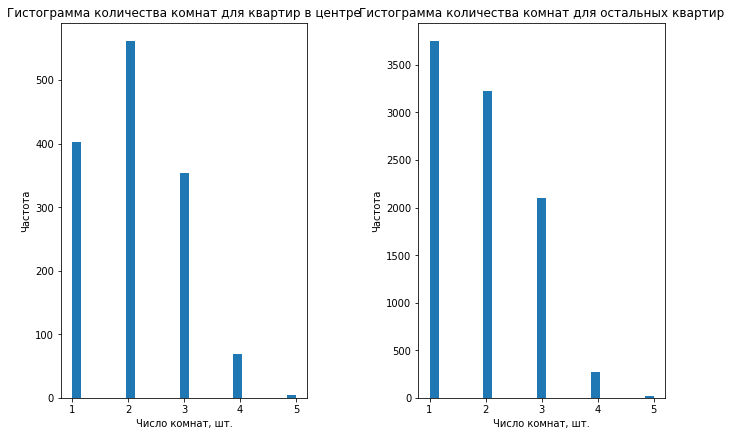

In [90]:
two_hist('rooms',
         'Гистограмма количества комнат для квартир в центре',
         'Число комнат, шт.',
         'Гистограмма количества комнат для остальных квартир'
        )

Для квартир в центре объявления приемущественно состоят из квартир с двумя комнатами. Для остальных квартир - с одной комнатой.

**Высота потолков**:

In [91]:
two_describe('ceiling_height')

Статистика для квартир в центре:
count   1391.00
mean       2.65
std        0.08
min        2.46
25%        2.65
50%        2.65
75%        2.65
max        2.85
Name: ceiling_height, dtype: float64

Статистика для остальных квартир:
 count   9366.00
mean       2.63
std        0.08
min        2.45
25%        2.55
50%        2.65
75%        2.65
max        2.85
Name: ceiling_height, dtype: float64


И там и там высота потолков приблизительно одинакова.

Построим гистограммы распределения:

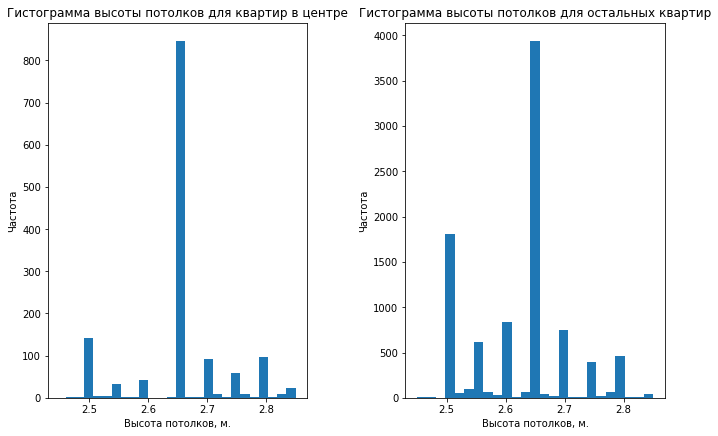

In [92]:
two_hist('ceiling_height',
         'Гистограмма высоты потолков для квартир в центре',
         'Высота потолков, м.',
         'Гистограмма высоты потолков для остальных квартир'
        )

Данные распределены приблизительно одинаково. Однако для квартир не в центре есть достаточно большое количество квартир с высотой потолков 2.5 м

Рассмотрим 10 параметров квартиры с наибольшей корреляцией:

In [93]:
spb_center.corr()['last_price_mil'].sort_values(ascending=False).to_frame('Коэффициент корреляции')[2:].head(10)

,Коэффициент корреляции
total_area,0.72
living_area,0.57
kitchen_area,0.49
rooms,0.44
price_per_square,0.33
ceiling_height,0.23
floors_total,0.17
floor,0.16
parks_nearest,0.12
ponds_around3000,0.11


Квартиры в центре имеют такой же топ значений, как и для всех квартир, но корреляция более явно выражена.

Построим графики boxplot для определения зависимости между медианной ценой на квартиру в центре и различными параметрами:

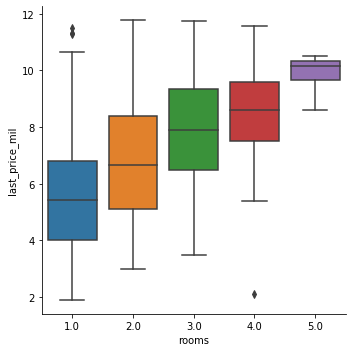

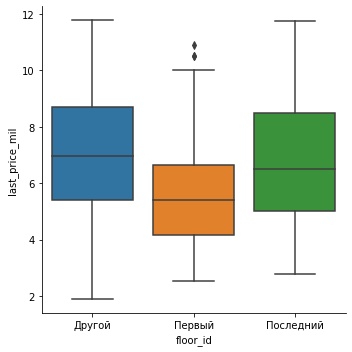

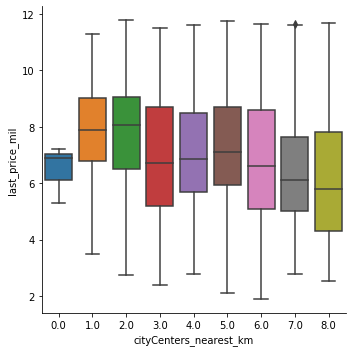

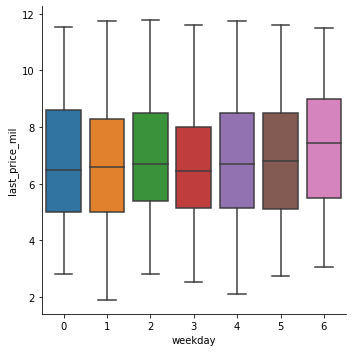

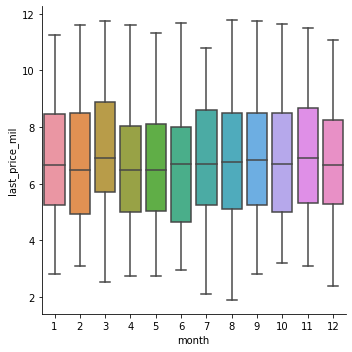

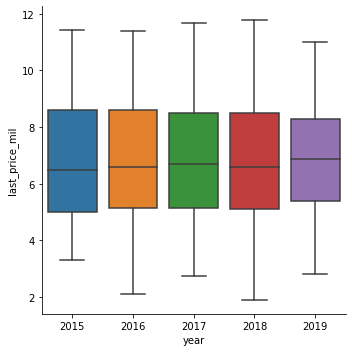

In [94]:
for col in ['rooms', 'floor_id', 'cityCenters_nearest_km', 'weekday', 'month', 'year']:
    sns.catplot(x=col, y='last_price_mil', kind='box', data=spb_center)

Зависимости для квартир в центре схожи для зависимостей остальных квартир. Однако можно наблюдать более стабильное распределение по году.

### Вывод

Были исследованы следующие параметры:
* Площадь
* Цена
* Число комнат
* Высота потолка

Данные были отфильтрованы, аномальные значения удалены.

В среднем в Санкт-Петербурге продавалась **2-х** комнатная квартира площадью **50 м²** с высотой потолков **2.6 - 2.7 м** по цене **5.4 млн. р.**

Были установлены ТОП-10 населенных пунктов, прилегающих к Санкт-Петербургу с наибольшим количество объявлений. **Наибольшее** количество объявлений принадлежит **Мурино**. Самое же дорогое жилье продается в **Пушкине** по цене **95 тыс. р. за м²**

Выделен сегмент квартир в центре Петербурга и проведен сравнительный анализ с остальными квартирами. По итогам исследования, можно считать, что в центре находится большее количество элитного жилья - средняя цена и общая площадь выше, чем в объявлениях для остальных квартир.

## Общий вывод

В ходе исследования было выяснено, что рыночная стоимость объекта зависит от следующих параметров:
* Общая площадь квартиры - чем больше площадь, тем выше цена.
* Число комнат - чем больше комнат, тем выше цена.
* Этаж - квартиры, находящиеся на первом и последнем этаже дешевле чем на других
* Высота потолков - более высокии потолки характеризует престижность жилья.
* Расстояние до центра города - чем ближе к центру, тем выше цена.